# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Ferrenti summary"
InsertApproach = "01-ferrenti-approach"
numberOfPrincipalComponents = 2

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,MP|spacegroup.number,MP|total_magnetization,MP|nelements,MP|efermi,MP|Eg,AFLOWML|Eg,MP|Polar SG,candidate
0,mp-7,S6,2.0,16,-0.261676,2.0,16,-0.261676,1.000000,1.000000,...,3.440,0.000070,148,0.000034,1,0.348895,2.4881,2.490,0,1.0
1,mp-14,Se3,2.0,34,-0.245806,2.0,34,-0.245806,1.000000,1.000000,...,3.010,0.000062,152,0.000000,1,1.879425,1.0119,0.997,0,1.0
2,mp-19,Te3,2.0,52,-0.226594,2.0,52,-0.226594,1.000000,1.000000,...,3.166,0.000054,152,0.000000,1,5.455518,0.5752,0.000,0,1.0
3,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,3.223,0.000086,194,0.000000,1,9.983070,3.3395,3.166,0,1.0
4,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,4.279,0.000086,227,0.000000,1,9.614764,4.3387,3.593,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,2.690,0.000052,3,0.000351,4,3.917413,2.3186,2.156,1,0.0
1521,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,2.749,0.000060,1,0.992766,4,3.987258,0.8079,0.000,1,0.0
1522,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,2.841,0.000060,5,6.504784,2,4.184540,0.1221,0.000,1,0.0
1523,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,2.725,0.000061,4,0.000485,3,2.323107,0.5907,0.000,1,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(23676, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.859105,1.0,0.685629,1.0,0.684134,1.0,0.717019
42,mp-370,Cd1S1,CdS,1.0,0.976187,1.0,0.913580,1.0,0.966415,1.0,0.982229
44,mp-380,Zn2Se2,ZnSe,1.0,0.981273,1.0,0.913580,1.0,0.990375,1.0,0.987721
82,mp-661,Al2N2,AlN,1.0,0.910176,1.0,0.913580,1.0,0.805974,1.0,0.861610
83,mp-672,Cd2S2,CdS,1.0,0.977892,1.0,0.913580,1.0,0.990375,1.0,0.987721
...,...,...,...,...,...,...,...,...,...,...,...
22989,mp-1202959,Zn18S18,ZnS,1.0,0.956394,1.0,0.913580,1.0,0.851651,1.0,0.976628
23181,mp-1203645,C48,C,1.0,0.833425,1.0,0.985714,1.0,0.966103,1.0,0.898879
23281,mp-1204046,Si106,Si,1.0,0.971624,1.0,0.913580,1.0,0.875626,1.0,0.977379
23351,mp-1204356,Si19C19,SiC,1.0,0.903783,1.0,0.913580,1.0,0.814495,1.0,0.967414


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
37,mp-344,B4N4,BN,1.0,0.726808,1.0,0.685629,1.0,0.643592,1.0,0.622957
123,mp-984,B2N2,BN,1.0,0.906206,1.0,0.913580,1.0,0.826856,1.0,0.961878
180,mp-1434,Mo1S2,MoS2,1.0,0.898163,1.0,0.685629,1.0,0.757552,1.0,0.781006
202,mp-1599,B4N4,BN,1.0,0.577174,0.0,0.221719,0.0,0.403925,0.0,0.342660
203,mp-1639,B1N1,BN,1.0,0.754707,1.0,0.685629,1.0,0.707031,1.0,0.682884
327,mp-2653,B2N2,BN,1.0,0.753618,1.0,0.685629,1.0,0.703900,1.0,0.682884
1761,mp-7991,B2N2,BN,1.0,0.899226,1.0,0.913580,1.0,0.826494,1.0,0.969556
2322,mp-9813,W1S2,WS2,1.0,0.901805,1.0,0.685629,1.0,0.711648,1.0,0.781006
2830,mp-13151,B4N4,BN,1.0,0.693298,1.0,0.685629,1.0,0.709382,1.0,0.682884
4786,mp-20305,In1As1,InAs,1.0,0.989160,1.0,0.913580,1.0,0.973905,1.0,0.987721


## How many entries does the models agree on? 

In [10]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.713876,1.0,0.685629,1.0,0.709362,1.0,0.682884
1,mp-24,C8,C,1.0,0.859105,1.0,0.685629,1.0,0.684134,1.0,0.717019
2,mp-25,N8,N2,1.0,0.969909,1.0,0.913580,1.0,0.896670,1.0,0.973490
3,mp-111,Ne1,Ne,1.0,0.979027,1.0,0.913580,1.0,0.865966,1.0,0.983823
4,mp-118,P24,P,1.0,0.975670,1.0,0.913580,1.0,0.898272,1.0,0.977379
...,...,...,...,...,...,...,...,...,...,...,...
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.600472,1.0,0.685629,1.0,0.578863,1.0,0.588264
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.744443,1.0,0.685629,1.0,0.714431,1.0,0.682884
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.858267,1.0,0.685629,1.0,0.729445,1.0,0.781006
23674,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.909437,1.0,0.685629,1.0,0.718622,1.0,0.781006


In [11]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
2,mp-25,N8,N2,1.0,0.969909,1.0,0.913580,1.0,0.896670,1.0,0.973490
3,mp-111,Ne1,Ne,1.0,0.979027,1.0,0.913580,1.0,0.865966,1.0,0.983823
4,mp-118,P24,P,1.0,0.975670,1.0,0.913580,1.0,0.898272,1.0,0.977379
5,mp-137,Ge12,Ge,1.0,0.986118,1.0,0.913580,1.0,0.941754,1.0,0.987721
6,mp-154,N8,N2,1.0,0.967694,1.0,0.913580,1.0,0.896670,1.0,0.973490
...,...,...,...,...,...,...,...,...,...,...,...
23586,mp-1205326,Tb7Pt1I12,Tb7PtI12,1.0,0.946215,1.0,0.913580,1.0,0.941019,1.0,0.891720
23588,mp-1205332,Te12Rh2Br6,Te6RhBr3,1.0,0.951974,1.0,0.913580,1.0,0.810062,1.0,0.976628
23599,mp-1205361,Te12Rh2I6,Te6RhI3,1.0,0.953722,1.0,0.913580,1.0,0.868739,1.0,0.976628
23607,mp-1205379,Ge4H16,GeH4,1.0,0.829421,1.0,0.985714,1.0,0.933648,1.0,0.950882


In [12]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.713876,1.0,0.685629,1.0,0.709362,1.0,0.682884
1,mp-24,C8,C,1.0,0.859105,1.0,0.685629,1.0,0.684134,1.0,0.717019
2,mp-25,N8,N2,1.0,0.969909,1.0,0.913580,1.0,0.896670,1.0,0.973490
3,mp-111,Ne1,Ne,1.0,0.979027,1.0,0.913580,1.0,0.865966,1.0,0.983823
4,mp-118,P24,P,1.0,0.975670,1.0,0.913580,1.0,0.898272,1.0,0.977379
...,...,...,...,...,...,...,...,...,...,...,...
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.600472,1.0,0.685629,1.0,0.578863,1.0,0.588264
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.744443,1.0,0.685629,1.0,0.714431,1.0,0.682884
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.858267,1.0,0.685629,1.0,0.729445,1.0,0.781006
23674,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.909437,1.0,0.685629,1.0,0.718622,1.0,0.781006


In [13]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
2,mp-25,N8,N2,1.0,0.969909,1.0,0.913580,1.0,0.896670,1.0,0.973490
3,mp-111,Ne1,Ne,1.0,0.979027,1.0,0.913580,1.0,0.865966,1.0,0.983823
4,mp-118,P24,P,1.0,0.975670,1.0,0.913580,1.0,0.898272,1.0,0.977379
5,mp-137,Ge12,Ge,1.0,0.986118,1.0,0.913580,1.0,0.941754,1.0,0.987721
6,mp-154,N8,N2,1.0,0.967694,1.0,0.913580,1.0,0.896670,1.0,0.973490
...,...,...,...,...,...,...,...,...,...,...,...
23588,mp-1205332,Te12Rh2Br6,Te6RhBr3,1.0,0.951974,1.0,0.913580,1.0,0.810062,1.0,0.976628
23599,mp-1205361,Te12Rh2I6,Te6RhI3,1.0,0.953722,1.0,0.913580,1.0,0.868739,1.0,0.976628
23607,mp-1205379,Ge4H16,GeH4,1.0,0.829421,1.0,0.985714,1.0,0.933648,1.0,0.950882
23618,mp-1205417,C20,C,1.0,0.948051,1.0,0.985714,1.0,0.952719,1.0,0.898879


In [14]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.713876,1.0,0.685629,1.0,0.709362,1.0,0.682884
1,mp-24,C8,C,1.0,0.859105,1.0,0.685629,1.0,0.684134,1.0,0.717019
2,mp-25,N8,N2,1.0,0.969909,1.0,0.913580,1.0,0.896670,1.0,0.973490
3,mp-111,Ne1,Ne,1.0,0.979027,1.0,0.913580,1.0,0.865966,1.0,0.983823
4,mp-118,P24,P,1.0,0.975670,1.0,0.913580,1.0,0.898272,1.0,0.977379
...,...,...,...,...,...,...,...,...,...,...,...
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.600472,1.0,0.685629,1.0,0.578863,1.0,0.588264
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.744443,1.0,0.685629,1.0,0.714431,1.0,0.682884
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.858267,1.0,0.685629,1.0,0.729445,1.0,0.781006
23674,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.909437,1.0,0.685629,1.0,0.718622,1.0,0.781006


In [15]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.713876,1.0,0.685629,1.0,0.709362,1.0,0.682884
1,mp-24,C8,C,1.0,0.859105,1.0,0.685629,1.0,0.684134,1.0,0.717019
2,mp-25,N8,N2,1.0,0.969909,1.0,0.913580,1.0,0.896670,1.0,0.973490
3,mp-111,Ne1,Ne,1.0,0.979027,1.0,0.913580,1.0,0.865966,1.0,0.983823
4,mp-118,P24,P,1.0,0.975670,1.0,0.913580,1.0,0.898272,1.0,0.977379
...,...,...,...,...,...,...,...,...,...,...,...
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.600472,1.0,0.685629,1.0,0.578863,1.0,0.588264
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.744443,1.0,0.685629,1.0,0.714431,1.0,0.682884
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.858267,1.0,0.685629,1.0,0.729445,1.0,0.781006
23674,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.909437,1.0,0.685629,1.0,0.718622,1.0,0.781006


In [17]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-11-04-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


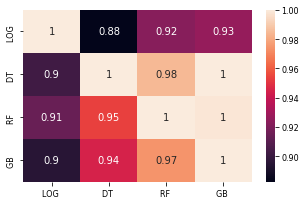

[1.0, 0.8826518412242946, 0.8809780009564802, 0.875597800095648, 0.9449426111908178, 0.9536704925872788, 0.9740820734341252, 1.0, 1.0, 0.895348126413595, 0.9142368115410477]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
LOG LOG LOG DT,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
LOG LOG RF DT,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
LOG RF GB DT,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
DT GB DT DT,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
DT RF DT DT,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
RF RF GB GB,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
RF RF RF RF,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
GB GB GB GB,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237
GB LOG LOG LOG,1.0,0.882652,0.880978,0.875598,0.944943,0.95367,0.974082,1.0,1.0,0.895348,0.914237


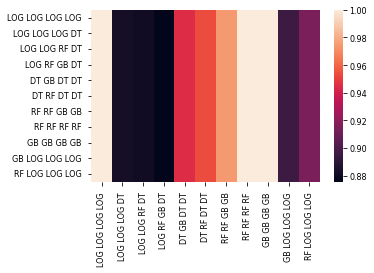

In [18]:
visualize.visualize_heatmap_of_combinations(Summary)

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2806.47it/s]
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


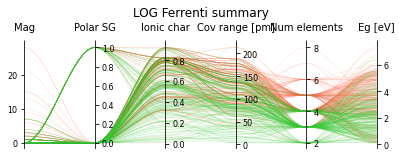

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3035.14it/s]


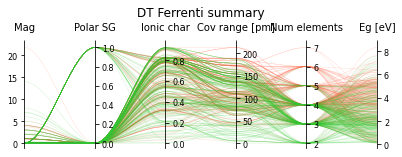

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3014.52it/s]


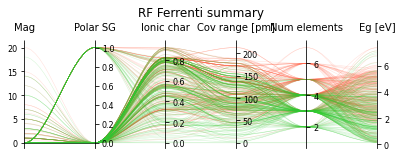

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3081.21it/s]


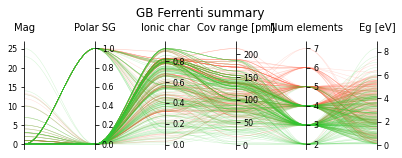

In [19]:
Summary = Summary[Summary["material_id"].isin(generatedData.material_id)].reset_index(drop=True)
generatedData = generatedData[generatedData["material_id"].isin(Summary.material_id)].reset_index(drop=True)
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)